In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib inline

In [2]:
from road_network.road_and_cars import VoidGenerator, Line, LineWLight, Crossroad, Car, CarManager, RoadManager, speeds
from road_network.prebuild_set import CrossroadAndLines, CrossroadAndLines2x2

x - вниз  
y - вправо

      1  
    2 0 4  
      3

# Road line without road light

In [3]:
line = Line(20)

In [4]:
line.add_car(Car())

1

In [6]:
CarManager.all_cars[1].id

1

In [7]:
line._next_state

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

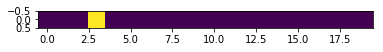

In [11]:
line.move_cars()
line.step()
line.process_output()
plt.imshow(line.render())

In [4]:
void = VoidGenerator(.2)

In [5]:
void.add_output(line)
line.add_output(void)

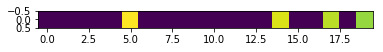

In [9]:
fig = plt.figure()

im = plt.imshow(line.render(), animated=True)

def updatefig(frame):
    line.move_cars(frame)
    void.move_cars(frame)
    line.step()
    void.step()
    line.process_output()
    void.process_output()
    prerender1 = line.render()
    im.set_array(prerender1)
    return im,


In [10]:
ani = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)

In [11]:
HTML(ani.to_html5_video())

# Road line with road light

In [12]:
line = LineWLight(20, 15, 10, 10)
void = VoidGenerator(.6)

In [13]:
void.add_output(line)
line.add_output(void)

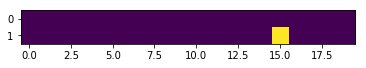

In [14]:
fig = plt.figure()

im = plt.imshow(line.render(), animated=True)

def updatefig(frame):
    line.move_cars(frame)
    void.move_cars(frame)
    line.step()
    void.step()
    line.process_output()
    void.process_output()
    prerender1 = line.render()
    im.set_array(prerender1)
    return im,

In [15]:
ani = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)
HTML(ani.to_html5_video())

# Bring them together

In [16]:
CarManager.all_cars = []

In [17]:
line1 = LineWLight(20, 15, 10, 10)
line2 = Line(20)
void = VoidGenerator(.8)

In [18]:
line1.add_output(line2)
line2.add_output(void)
void.add_output(line1)

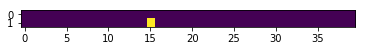

In [19]:
fig = plt.figure()

prerender1 = line1.render()
prerender2 = line2.render()

im = plt.imshow(np.hstack((prerender1, np.vstack((prerender2, np.zeros_like(prerender2))))) , animated=True)

def updatefig(frame):
    line1.move_cars(frame)
    line2.move_cars(frame)
    void.move_cars(frame)
    line1.step()
    line2.step()
    void.step()
    line1.process_output()
    line2.process_output()
    void.process_output()
    
    prerender1 = line1.render()
    prerender2 = line2.render()
    
    

    im.set_array(np.hstack((prerender1, np.vstack((prerender2, np.zeros_like(prerender2))))))
    return im,

In [20]:
ani = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)
HTML(ani.to_html5_video())

# Crossroad and lines

In [38]:
CarManager.all_cars = []

In [39]:
lineW0 = LineWLight(20, 18, 20, 10)
lineW1 = LineWLight(20, 18, 20, 10)
lineW2 = LineWLight(20, 18, 20, 10, 15)
lineW3 = LineWLight(20, 18, 20, 10, 15)

line0 = Line(20)
line1 = Line(20)
line2 = Line(20)
line3 = Line(20)

crossroad = Crossroad(1, 1, 1, 1)

void = VoidGenerator(.8)

In [40]:
lineW0.add_output(crossroad, 0, 0)
lineW1.add_output(crossroad, 0, 1)
lineW2.add_output(crossroad, 0, 2)
lineW3.add_output(crossroad, 0, 3)

crossroad.add_output(line0, 0)
crossroad.add_output(line1, 1)
crossroad.add_output(line2, 2)
crossroad.add_output(line3, 3)

void.add_output(lineW0, 0)
void.add_output(lineW1, 1)
void.add_output(lineW2, 2)
void.add_output(lineW3, 3)

line0.add_output(void, 0, 0)
line1.add_output(void, 0, 1)
line2.add_output(void, 0, 2)
line3.add_output(void, 0, 3)

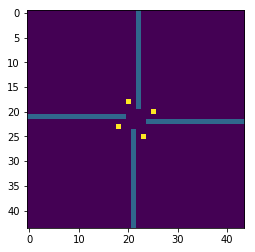

In [41]:
fig = plt.figure()

lw0 = lineW0.render()
lw1 = lineW1.render()
lw2 = lineW2.render()
lw3 = lineW3.render()

cr = crossroad.render()

l0 = line0.render() + 1
l1 = line1.render() + 1
l2 = line2.render() + 1
l3 = line3.render() + 1

top = np.concatenate((np.zeros((lw2.shape[1], lw1.shape[1])), np.fliplr(np.transpose(lw2)), np.flip(np.transpose(l3)), np.zeros((lw2.shape[1], l1.shape[1]+1))), axis=1)
bottom = np.concatenate((np.zeros((lw2.shape[1], lw1.shape[1]+1)), np.transpose(l2), np.flip(np.flip(np.transpose(lw3)), axis=1), np.zeros((lw2.shape[1], l1.shape[1]))), axis=1)

left = np.concatenate((np.zeros_like(l0), np.fliplr(l0), lw1))
right = np.concatenate((np.flipud(np.fliplr(lw0)), l1, np.zeros_like(l1)))

center = np.hstack((left, cr, right))


im = plt.imshow(np.vstack((top, center, bottom)) , animated=True)

roads = [lineW0, lineW1, lineW2, lineW3, line0, line1, line2, line3, crossroad, void]

def updatefig(frame):
    for road in roads:
        road.move_cars(frame)
    
    for road in roads:
        road.step(frame)
    
    for road in roads[:-2]:
        road.process_output(frame)
    
    for road in roads[-2:]:
        road.process_outputs()
    
    lw0 = lineW0.render()
    lw1 = lineW1.render()
    lw2 = lineW2.render()
    lw3 = lineW3.render()

    cr = crossroad.render()

    l0 = line0.render()
    l1 = line1.render()
    l2 = line2.render()
    l3 = line3.render()

    top = np.concatenate((np.zeros((lw2.shape[1], lw1.shape[1])), np.fliplr(np.transpose(lw2)), np.flip(np.transpose(l3)), np.zeros((lw2.shape[1], l1.shape[1]+1))), axis=1)
    bottom = np.concatenate((np.zeros((lw2.shape[1], lw1.shape[1]+1)), np.transpose(l2), np.flip(np.flip(np.transpose(lw3)), axis=1), np.zeros((lw2.shape[1], l1.shape[1]))), axis=1)

    left = np.concatenate((np.zeros_like(l0), np.fliplr(l0), lw1))
    right = np.concatenate((np.flipud(np.fliplr(lw0)), l1, np.zeros_like(l1)))

    center = np.hstack((left, cr, right))

    im.set_array(np.vstack((top, center, bottom)))
    return im,

In [42]:
top.shape, center.shape, bottom.shape

((20, 44), (4, 44), (20, 44))

In [43]:
ani = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)
HTML(ani.to_html5_video())

# Pre-created crossroad

In [3]:
crossroad = CrossroadAndLines(10, 20, 10)
void = VoidGenerator(.6)

In [4]:
for i in range(4):
    crossroad.output_roads[i].add_output(void, 0, i)
    void.add_output(crossroad.input_roads[i], i, 0)

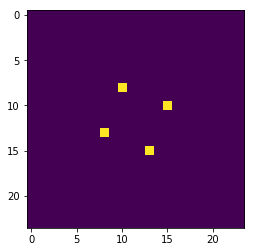

In [5]:
fig = plt.figure()
im = plt.imshow(crossroad.render(), animated=True)

def updatefig(frame):
    crossroad.move_cars(frame)
    void.move_cars(frame)
    
    crossroad.step(frame)
    void.step(frame)
    
    crossroad.process_outputs()
    void.process_outputs()
    
    im.set_array(crossroad.render())
    return im,

In [6]:
ani = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)
HTML(ani.to_html5_video())

In [7]:
crossroad.get_stats()

AttributeError: 'CrossroadAndLines' object has no attribute 'roads'

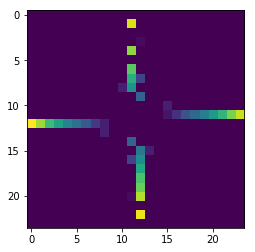

In [31]:
plt.imshow(crossroad.get_history(-1)[20])

# 4 Crossroads

In [25]:
CarManager.all_cars = []

In [26]:
crossroads = CrossroadAndLines2x2(10, 20, 10, [5, 8, 9, 0])
void = VoidGenerator(.6)

In [31]:
crossroads.crossroad3.input_roads[3].add_car(Car())

1

In [6]:
crossroads.crossroads[0].output_roads[0].add_output(void, 0, 0)
crossroads.crossroads[0].output_roads[3].add_output(void, 0, 1)

crossroads.crossroads[1].output_roads[1].add_output(void, 0, 2)
crossroads.crossroads[1].output_roads[3].add_output(void, 0, 3)

crossroads.crossroads[2].output_roads[0].add_output(void, 0, 4)
crossroads.crossroads[2].output_roads[2].add_output(void, 0, 5)

crossroads.crossroads[3].output_roads[1].add_output(void, 0, 6)
crossroads.crossroads[3].output_roads[2].add_output(void, 0, 7)

In [7]:
void.add_output(crossroads.crossroads[0].input_roads[1], 0)
void.add_output(crossroads.crossroads[0].input_roads[2], 1)

void.add_output(crossroads.crossroads[1].input_roads[0], 2)
void.add_output(crossroads.crossroads[1].input_roads[2], 3)

void.add_output(crossroads.crossroads[2].input_roads[1], 4)
void.add_output(crossroads.crossroads[2].input_roads[3], 5)

void.add_output(crossroads.crossroads[3].input_roads[0], 6)
void.add_output(crossroads.crossroads[3].input_roads[3], 7)

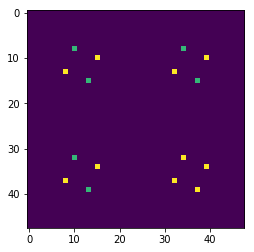

In [8]:
fig = plt.figure()
im = plt.imshow(crossroads.render(), animated=True)
roads = [crossroads, void]

def updatefig(frame):
    for road in roads:
        road.move_cars(frame)
    
    for road in roads:
        road.step(frame)
    
    for road in roads:
        road.process_outputs()
    
    
#     cr1 = crossroad1.render()
#     cr2 = crossroad2.render()
#     cr3 = crossroad3.render()
#     cr4 = crossroad4.render()

#     top = np.concatenate((cr1, cr2), axis=1)
#     bottom = np.concatenate((cr3, cr4), axis=1)
    
    im.set_array(crossroads.render())
    return im,

In [10]:
ani = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)
HTML(ani.to_html5_video())

# And now 16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib inline
from road_network.road_and_cars import RoadManager, VoidGenerator, CarManager
from road_network.prebuild_set import CrossroadAndLines2x2

In [2]:
CarManager.all_cars = []

In [3]:
RoadManager.roads = []

In [4]:
cross1 = CrossroadAndLines2x2(10, 20, 20, [5, 8, 9, 0], name="Cross1")
cross2 = CrossroadAndLines2x2(10, 20, 20, [16, 3, 3, 5], name="Cross2")
cross3 = CrossroadAndLines2x2(10, 20, 20, [8, 19, 3, 4], name="Cross3")
cross4 = CrossroadAndLines2x2(10, 20, 20, [9, 2, 5, 3], name="Cross4")

void = VoidGenerator(.1, random_walk=True)

In [5]:
cross1.crossroad1.output_roads[0].add_output(void, 0, 0)
cross1.crossroad1.output_roads[3].add_output(void, 0, 1)

cross1.crossroad2.output_roads[1].add_output(cross2.crossroad1.input_roads[1], 0, 0)
cross1.crossroad2.output_roads[3].add_output(void, 0, 2)

cross1.crossroad3.output_roads[0].add_output(void, 0, 3)
cross1.crossroad3.output_roads[2].add_output(cross3.crossroad1.input_roads[2], 0, 0)

cross1.crossroad4.output_roads[1].add_output(cross2.crossroad3.input_roads[1], 0, 0)
cross1.crossroad4.output_roads[2].add_output(cross3.crossroad2.input_roads[2], 0, 0)

################################################################
cross2.crossroads[0].output_roads[0].add_output(cross1.crossroad2.input_roads[0], 0, 0)
cross2.crossroads[0].output_roads[3].add_output(void, 0, 4)

cross2.crossroads[1].output_roads[1].add_output(void, 0, 5)
cross2.crossroads[1].output_roads[3].add_output(void, 0, 6)

cross2.crossroads[2].output_roads[0].add_output(cross1.crossroad4.input_roads[0], 0, 0)
cross2.crossroads[2].output_roads[2].add_output(cross4.crossroad1.input_roads[2], 0, 0)

cross2.crossroads[3].output_roads[1].add_output(void, 0, 7)
cross2.crossroads[3].output_roads[2].add_output(cross4.crossroad2.input_roads[2], 0, 0)

################################################################
cross3.crossroads[0].output_roads[0].add_output(void, 0, 8)
cross3.crossroads[0].output_roads[3].add_output(cross1.crossroad3.input_roads[3], 0, 0)

cross3.crossroads[1].output_roads[1].add_output(cross4.crossroad1.input_roads[1], 0, 0)
cross3.crossroads[1].output_roads[3].add_output(cross1.crossroad4.input_roads[3], 0, 0)

cross3.crossroads[2].output_roads[0].add_output(void, 0, 9)
cross3.crossroads[2].output_roads[2].add_output(void, 0, 10)

cross3.crossroads[3].output_roads[1].add_output(cross4.crossroad3.input_roads[1], 0, 0)
cross3.crossroads[3].output_roads[2].add_output(void, 0, 11)

################################################################
cross4.crossroads[0].output_roads[0].add_output(cross3.crossroad2.input_roads[0], 0, 0)
cross4.crossroads[0].output_roads[3].add_output(cross2.crossroad3.input_roads[3], 0, 0)

cross4.crossroads[1].output_roads[1].add_output(void, 0, 12)
cross4.crossroads[1].output_roads[3].add_output(cross2.crossroad4.input_roads[3], 0, 0)

cross4.crossroads[2].output_roads[0].add_output(cross3.crossroads[3].input_roads[0], 0, 0)
cross4.crossroads[2].output_roads[2].add_output(void, 0, 13)

cross4.crossroads[3].output_roads[1].add_output(void, 0, 14)
cross4.crossroads[3].output_roads[2].add_output(void, 0, 15)

In [6]:
cross2.crossroad4.output_roads[2]._outputs

[(Cross4/Crossroad2/LineWLight3, 0)]

In [7]:
void.add_output(cross1.crossroads[0].input_roads[1], 0)
void.add_output(cross1.crossroads[0].input_roads[2], 1)

void.add_output(cross1.crossroads[1].input_roads[2], 2)
void.add_output(cross1.crossroads[2].input_roads[1], 3)

#######################################################
void.add_output(cross2.crossroads[1].input_roads[0], 4)
void.add_output(cross2.crossroads[1].input_roads[2], 5)

void.add_output(cross2.crossroads[0].input_roads[2], 6)
void.add_output(cross2.crossroads[3].input_roads[0], 7)

#######################################################
void.add_output(cross3.crossroads[2].input_roads[1], 8)
void.add_output(cross3.crossroads[2].input_roads[3], 9)

void.add_output(cross3.crossroads[0].input_roads[1], 10)
void.add_output(cross3.crossroads[3].input_roads[3], 11)

#######################################################
void.add_output(cross4.crossroads[3].input_roads[0], 12)
void.add_output(cross4.crossroads[3].input_roads[3], 13)

void.add_output(cross4.crossroads[1].input_roads[0], 14)
void.add_output(cross4.crossroads[2].input_roads[3], 15)

In [8]:
image = np.vstack((np.hstack((cross1.render(),cross2.render())), np.hstack((cross3.render(), cross4.render()))))

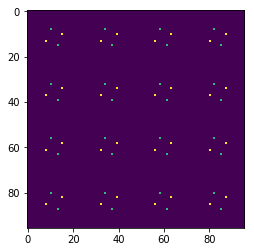

In [9]:
fig = plt.figure()
im = plt.imshow(image, animated=True)
roads = [cross1, cross2, cross3, cross4, void]

def updatefig(frame):
    for road in RoadManager.roads:
        road.move_cars(frame)
    
    for road in RoadManager.roads:
        road.step(frame)
    
    for road in RoadManager.roads:
        road.process_outputs()
    
    
#     cr1 = crossroad1.render()
#     cr2 = crossroad2.render()
#     cr3 = crossroad3.render()
#     cr4 = crossroad4.render()

#     top = np.concatenate((cr1, cr2), axis=1)
#     bottom = np.concatenate((cr3, cr4), axis=1)
    
    im.set_array(np.vstack((np.hstack((cross1.render(),cross2.render())), np.hstack((cross3.render(), cross4.render())))))
    return im,

In [11]:
ani = animation.FuncAnimation(fig, updatefig, interval=100, blit=True)
HTML(ani.to_html5_video())

# Collecting data

In [4]:
from tqdm import tqdm_notebook as tqdm

In [5]:
NUM_EPOCH = 500
LAST_N = 450
N_STEPS = 10
RED = 20
GREEn = 20

In [6]:
def execute_with(p:int):
    cross1 = CrossroadAndLines2x2(10, RED, GREEn, [5, 8, 9, 0])
    cross2 = CrossroadAndLines2x2(10, RED, GREEn, [16, 3, 3, 5])
    cross3 = CrossroadAndLines2x2(10, RED, GREEn, [8, 19, 3, 4])
    cross4 = CrossroadAndLines2x2(10, RED, GREEn, [9, 2, 5, 3])

    void = VoidGenerator(p, random_walk=True)
    ############################################################
    ############################################################
    cross1.crossroad1.output_roads[0].add_output(void, 0, 0)
    cross1.crossroad1.output_roads[3].add_output(void, 0, 1)

    cross1.crossroad2.output_roads[1].add_output(cross2.crossroad1.input_roads[1], 0, 0)
    cross1.crossroad2.output_roads[3].add_output(void, 0, 2)

    cross1.crossroad3.output_roads[0].add_output(void, 0, 3)
    cross1.crossroad3.output_roads[2].add_output(cross3.crossroad1.input_roads[2], 0, 0)

    cross1.crossroad4.output_roads[1].add_output(cross2.crossroad3.input_roads[1], 0, 0)
    cross1.crossroad4.output_roads[2].add_output(cross3.crossroad2.input_roads[2], 0, 0)

    ################################################################
    cross2.crossroads[0].output_roads[0].add_output(cross1.crossroad2.input_roads[0], 0, 0)
    cross2.crossroads[0].output_roads[3].add_output(void, 0, 4)

    cross2.crossroads[1].output_roads[1].add_output(void, 0, 5)
    cross2.crossroads[1].output_roads[3].add_output(void, 0, 6)

    cross2.crossroads[2].output_roads[0].add_output(cross1.crossroad4.input_roads[0], 0, 0)
    cross2.crossroads[2].output_roads[2].add_output(cross4.crossroad1.input_roads[2], 0, 0)

    cross2.crossroads[3].output_roads[1].add_output(void, 0, 7)
    cross2.crossroads[3].output_roads[2].add_output(cross4.crossroad2.input_roads[2], 0, 0)

    ################################################################
    cross3.crossroads[0].output_roads[0].add_output(void, 0, 8)
    cross3.crossroads[0].output_roads[3].add_output(cross1.crossroad3.input_roads[3], 0, 0)

    cross3.crossroads[1].output_roads[1].add_output(cross4.crossroad1.input_roads[1], 0, 0)
    cross3.crossroads[1].output_roads[3].add_output(cross1.crossroad4.input_roads[3], 0, 0)

    cross3.crossroads[2].output_roads[0].add_output(void, 0, 9)
    cross3.crossroads[2].output_roads[2].add_output(void, 0, 10)

    cross3.crossroads[3].output_roads[1].add_output(cross4.crossroad3.input_roads[1], 0, 0)
    cross3.crossroads[3].output_roads[2].add_output(void, 0, 11)

    ################################################################
    cross4.crossroads[0].output_roads[0].add_output(cross3.crossroad2.input_roads[0], 0, 0)
    cross4.crossroads[0].output_roads[3].add_output(cross2.crossroad3.input_roads[3], 0, 0)

    cross4.crossroads[1].output_roads[1].add_output(void, 0, 12)
    cross4.crossroads[1].output_roads[3].add_output(cross2.crossroad4.input_roads[3], 0, 0)

    cross4.crossroads[2].output_roads[0].add_output(cross3.crossroads[3].input_roads[0], 0, 0)
    cross4.crossroads[2].output_roads[2].add_output(void, 0, 13)

    cross4.crossroads[3].output_roads[1].add_output(void, 0, 14)
    cross4.crossroads[3].output_roads[2].add_output(void, 0, 15)
    ############################################################
    ############################################################
    void.add_output(cross1.crossroads[0].input_roads[1], 0)
    void.add_output(cross1.crossroads[0].input_roads[2], 1)

    void.add_output(cross1.crossroads[1].input_roads[2], 2)
    void.add_output(cross1.crossroads[2].input_roads[1], 3)

    #######################################################
    void.add_output(cross2.crossroads[1].input_roads[0], 4)
    void.add_output(cross2.crossroads[1].input_roads[2], 5)

    void.add_output(cross2.crossroads[0].input_roads[2], 6)
    void.add_output(cross2.crossroads[3].input_roads[0], 7)

    #######################################################
    void.add_output(cross3.crossroads[2].input_roads[1], 8)
    void.add_output(cross3.crossroads[2].input_roads[3], 9)

    void.add_output(cross3.crossroads[0].input_roads[1], 10)
    void.add_output(cross3.crossroads[3].input_roads[3], 11)

    #######################################################
    void.add_output(cross4.crossroads[3].input_roads[0], 12)
    void.add_output(cross4.crossroads[3].input_roads[3], 13)

    void.add_output(cross4.crossroads[1].input_roads[0], 14)
    void.add_output(cross4.crossroads[2].input_roads[3], 15)
    
    
    roads = [cross1, cross2, cross3, cross4, void]
    
    for epoch in range(NUM_EPOCH):
        for road in RoadManager.roads:
            road.move_cars(epoch)
    
        for road in RoadManager.roads:
            road.step(epoch)

        for road in RoadManager.roads:
            road.process_outputs()
    
    stats = np.zeros((LAST_N, 4))
    for road in RoadManager.roads[:-1]:
#         print(np.array(road.get_stats()).shape)
        stats += np.array(road.get_stats()[-LAST_N:])
        del road
    
    for car in CarManager.all_cars:
        del car
    CarManager.all_cars = []
    return stats

In [7]:
results = np.array([[0, 0, 0, 0]])

In [8]:
for p in tqdm(np.linspace(0, 1, N_STEPS), total = N_STEPS):
    results = np.vstack((results, execute_with(p)))

In [9]:
results = results[1:, 1:]

In [10]:
density = results[:, 1]/results[:, 0]

In [11]:
speed = results[:, 2]/results[:, 1]
speed[np.isnan(speed)] = 0

c:\users\doctortyrsa\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [12]:
flow = speed*density

In [13]:
density_speed_flow = np.hstack((density.reshape((-1, 1)), speed.reshape((-1, 1)), flow.reshape((-1, 1))))

In [14]:
np.save("superstatistic.npy", density_speed_flow)

Text(0, 0.5, 'Traffic flow')

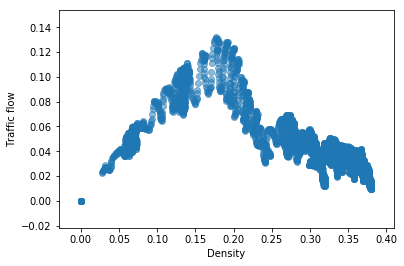

In [15]:
plt.scatter(density_speed_flow[:, 0], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Traffic flow")

Text(0, 0.5, 'Speed')

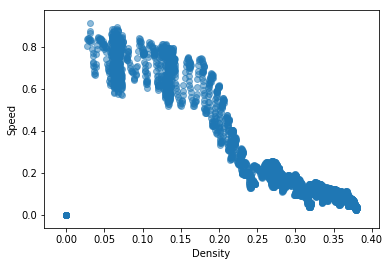

In [16]:
plt.scatter(density_speed_flow[:, 0], density_speed_flow[:, 1], alpha=.5, )
plt.xlabel("Density")
plt.ylabel("Speed")

Text(0, 0.5, 'Traffic flow')

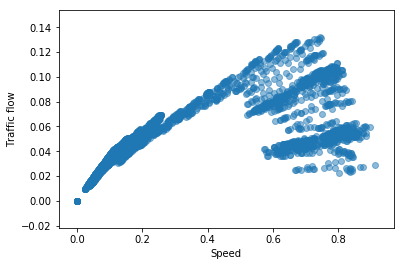

In [17]:
plt.scatter(density_speed_flow[:, 1], density_speed_flow[:, 2], alpha=.5, )
plt.xlabel("Speed")
plt.ylabel("Traffic flow")